In [1]:
import os
import numpy as np
import sys
from collections import Counter
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from stop_words import get_stop_words

In [2]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [3]:
print(get_stop_words('en'))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [4]:
Lem = WordNetLemmatizer()
translator = str.maketrans('', '', string.punctuation)
text_list = os.listdir("article/")
total_length = len(text_list)
total_list = []
count_list = []
most_list = []
for article in text_list:
	file_name = "article/" + str(article)
	file_read = open(file_name, 'r')
	temp = []
	for line in file_read:
		if line == "\n":
			continue
		line = line.translate(translator)
		temp.append(line.strip("\n").strip('"').split(' '))
	temp = [word.lower() for word in temp[0]]
	temp = [word for word in temp if word not in stopwords.words('english')]
	temp = [word for word in temp if word not in get_stop_words('en')]
	temp = [word for word in temp if len(word) != 0]
	temp = [Lem.lemmatize(Lem.lemmatize(word, 'v'), 'n') for word in temp]
	temp = [temp]
	# print(temp)
	# break
	tokens = []
	for i in range(len(temp)):
		tokens += temp[i]
	# print(tokens)
	total_list += tokens
	count = Counter(tokens)
	count_list.append(count)
	most_list.append(count.most_common(75))
	# print(article)
	# print(most_list)
	file_read.close()

In [5]:
total_count = Counter(total_list)
total_most = total_count.most_common(75)

In [6]:
print(most_list[0])

[('model', 23), ('sentence', 16), ('task', 13), ('semantic', 12), ('encoder', 12), ('similarity', 11), ('train', 9), ('universal', 7), ('learn', 6), ('text', 6), ('variety', 6), ('use', 6), ('response', 6), ('classification', 6), ('language', 5), ('representation', 5), ('share', 5), ('describe', 5), ('architecture', 5), ('textual', 4), ('natural', 4), ('research', 4), ('performance', 4), ('new', 4), ('tensorflow', 4), ('way', 4), ('similar', 4), ('encode', 4), ('also', 3), ('two', 3), ('paper', 3), ('hub', 3), ('semantically', 3), ('old', 3), ('different', 3), ('give', 3), ('input', 3), ('include', 3), ('relatedness', 3), ('time', 3), ('dan', 3), ('transformer', 3), ('constant', 3), ('lite', 3), ('engineer', 2), ('google', 2), ('recent', 2), ('progress', 2), ('understand', 2), ('truly', 2), ('limit', 2), ('build', 2), ('example', 2), ('discus', 2), ('hope', 2), ('excite', 2), ('introduce', 2), ('age', 2), ('answer', 2), ('word', 2), ('aim', 2), ('return', 2), ('add', 2), ('prediction',

In [7]:
print(total_most)

[('model', 270), ('learn', 227), ('use', 196), ('image', 167), ('google', 158), ('research', 149), ('train', 131), ('machine', 111), ('make', 99), ('new', 94), ('work', 92), ('network', 89), ('also', 86), ('algorithm', 85), ('system', 82), ('quantum', 82), ('data', 79), ('deep', 74), ('example', 70), ('one', 69), ('neural', 61), ('include', 60), ('speech', 59), ('show', 58), ('result', 57), ('many', 55), ('help', 53), ('task', 51), ('paper', 51), ('computer', 50), ('video', 50), ('quality', 50), ('well', 49), ('challenge', 49), ('team', 49), ('different', 47), ('improve', 46), ('label', 46), ('tensorflow', 45), ('number', 45), ('prediction', 44), ('find', 44), ('user', 44), ('like', 43), ('application', 42), ('patient', 42), ('first', 42), ('time', 41), ('technology', 41), ('accuracy', 41), ('process', 41), ('search', 41), ('dataset', 40), ('architecture', 40), ('open', 40), ('provide', 39), ('focus', 39), ('signal', 38), ('predict', 38), ('cell', 38), ('natural', 37), ('build', 37), (

In [8]:
file1 = open("file1_count.csv", 'w')
file1.write('word,count\n')
for i in range(len(most_list[0])):
    file1.write(str(most_list[0][i][0])+','+str(most_list[0][i][1])+'\n')
file1.close()

c:\python36\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


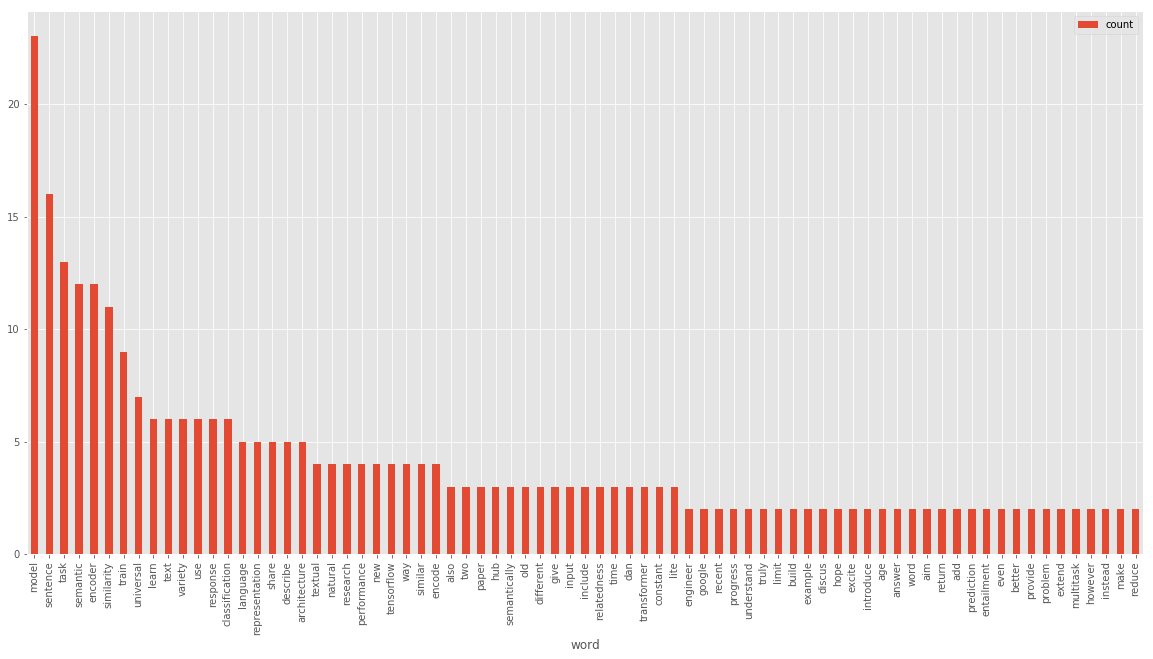

In [9]:
plt.rcParams['font.family']='SimHei'
plt.style.use('ggplot')
df1=pd.read_csv("file1_count.csv",encoding="big5")
df1.plot(x = 'word', y = 'count', kind='bar', figsize=(20, 10))
plt.show()

In [10]:
file = open("total_count.csv", 'w')
file.write('word,count\n')
for i in range(len(total_most)):
	# print(total_most[i][0])
	file.write(str(total_most[i][0])+','+str(total_most[i][1])+'\n')
file.close()

c:\python36\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


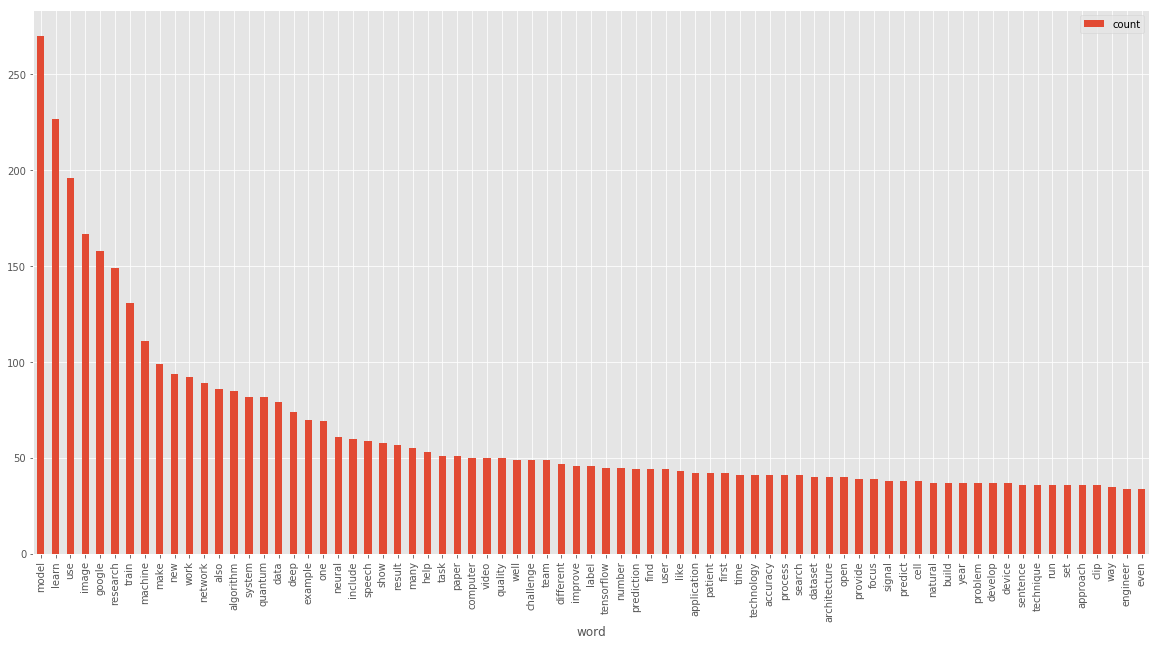

In [11]:
plt.rcParams['font.family']='SimHei'
plt.style.use('ggplot')
df1=pd.read_csv("total_count.csv",encoding="big5")
df1.plot(x = 'word', y = 'count', kind='bar', figsize=(20, 10))
plt.show()

In [12]:
len(count)

187

In [13]:
len(total_count)

4401